In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from helpers.cm26 import DatasetCM26
from helpers.selectors import select_NA, select_Pacific, select_Cem, select_globe, compare, plot
from helpers.operators import Coarsen, Filtering, Subsampling, CoarsenKochkov, CoarsenWeighted

import hvplot.xarray
import hvplot
import cmocean

%load_ext autoreload
%autoreload 3

In [4]:
%time ds = DatasetCM26()

CPU times: user 1.57 s, sys: 472 ms, total: 2.04 s
Wall time: 1.54 s


In [5]:
%time batch = ds.sample_batch(factors=[2], operator = Filtering(FGR=6)+Subsampling())

CPU times: user 28.3 s, sys: 16.4 s, total: 44.7 s
Wall time: 18.7 s


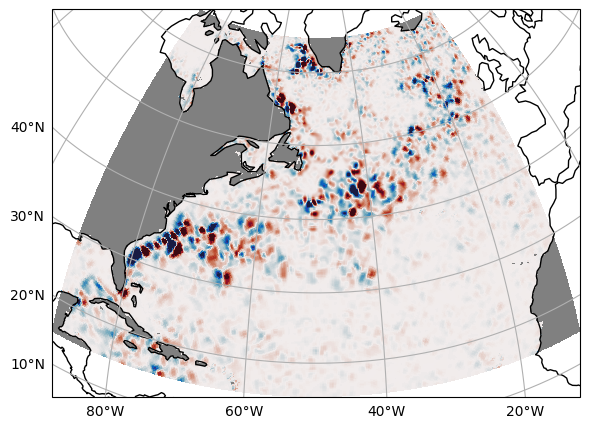

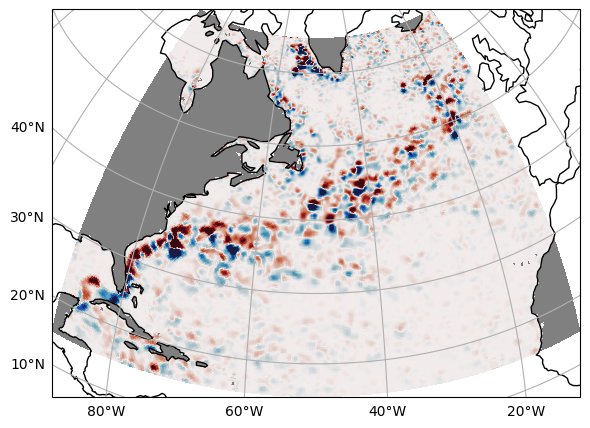

In [6]:
factor = 2
plot(batch[factor].data.SGSx, batch[factor].param.wet_u, selector=select_NA)
plot(batch[factor].data.SGSy, batch[factor].param.wet_v, selector=select_NA)

# Comparing to LEAP branch

In [7]:
for i in range(3):
    %time batch = ds.sample_batch(percentile=0, operator=Coarsen(), factors=[2,4,6,10,20], time=[7,9,11,12,40,90,100])

CPU times: user 1min 6s, sys: 20 s, total: 1min 26s
Wall time: 26.4 s
CPU times: user 1min 4s, sys: 16.7 s, total: 1min 21s
Wall time: 20.8 s
CPU times: user 1min 3s, sys: 16.1 s, total: 1min 19s
Wall time: 20.3 s


In [8]:
data = batch[4].data.isel(time=0)
param = batch[4].param

In [9]:
data_ctrl = xr.open_dataset('../leap-test/factor-4-coarsen-data.nc')
param_ctrl = xr.open_dataset('../leap-test/factor-4-param.nc')
for key in ['xq', 'yq', 'xh', 'yh']:
    data_ctrl[key] = data[key]
    param_ctrl[key] = data[key]

Correlation: 0.9987789955644458
Relative Error: 0.012215872526993394
R2 =  0.9975590294554124
R2 max =  0.9975592530965892
Optinal scaling: 1.0004737096310923
Nans [test/control]: [0, 0]


Correlation: 0.9985844727526756
Relative Error: 0.012008566688680137
R2 =  0.9971684147941531
R2 max =  0.9971710662893954
Optinal scaling: 1.0016333127483925
Nans [test/control]: [0, 0]


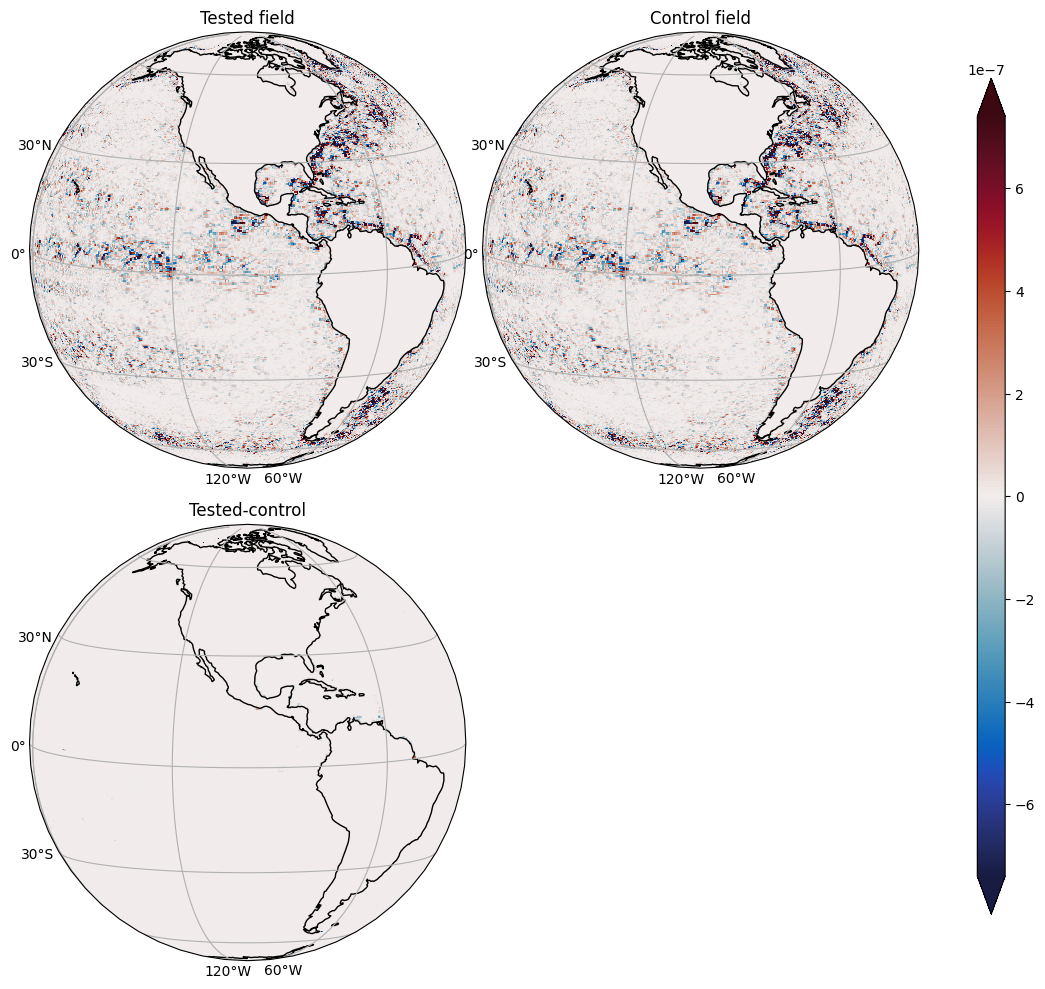

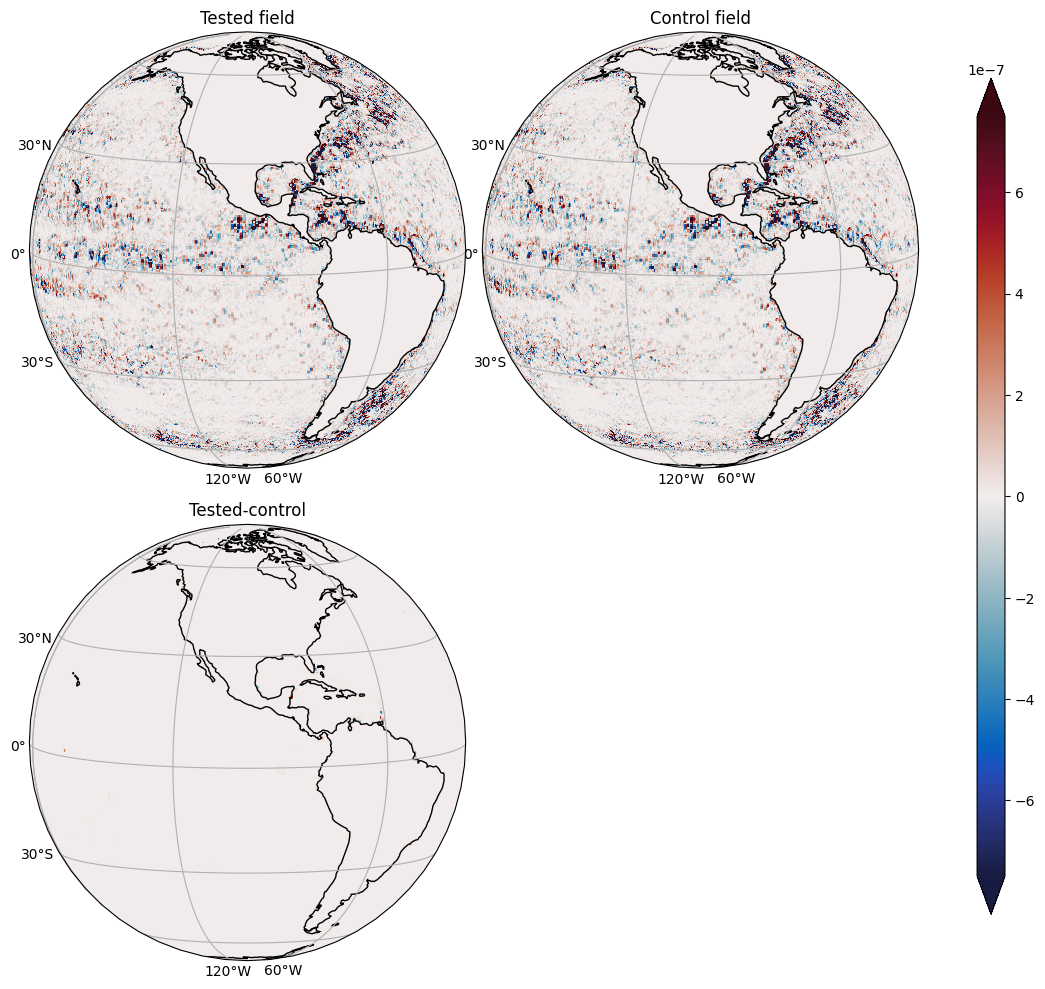

In [11]:
compare(data.SGSx, data_ctrl.SGSx, selector=select_globe)
print('\n')
compare(data.SGSy, data_ctrl.SGSy, selector=select_globe)